In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import FootballClf
from FixturesOdds import FixturesOdds

In [4]:
fixture_cols=['FixtureDateAsDate','HomeTeam', 'AwayTeam']
odds_cols=['HomeOdds', 'DrawOdds', 'AwayOdds']
predict_cols=['prediction']
result_cols=['HomeTeamResult']
bet_results_cols=['stake', 'applic_odds', 'betprofit']
derived_cols=['HTRecord', 'HTRecord', 'ExpectedResult', 'FTHG_3', 'FTAG_3']

In [5]:
def summary(fix, agg_level):
    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.to_period(agg_level).dt.start_time)
    df = pd.DataFrame(grouper.betprofit.sum())
    df['stake'] = grouper.stake.sum()
    df['betting_account'] = df.betprofit.cumsum()
    
    return df

In [18]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [19]:
fix_pred.df.columns

Index(['FixtureID', 'season', 'leagueid', 'fixDate', 'HomeTeamID', 'FTHG',
       'AwayTeamID', 'FTAG', 'HomeELO_prev', 'AwayELO_prev', 'HomeTeamResult',
       'AwayTeamResult', 'HomeTeam', 'AwayTeam', 'FTHG_3', 'FTAG_3', 'FTHG_5',
       'FTAG_5', 'HomeOdds', 'DrawOdds', 'AwayOdds', 'FixtureDateAsDate',
       'Target', 'HTRecord', 'ATRecord', 'ExpectedResult', 'FTG_3', 'FTG_5'],
      dtype='object')

In [20]:
X=fix_pred.X()
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf_2.2')

In [21]:
fix_pred.df['prediction'] = clf.predict(fix_pred.X())

In [22]:
fix_pred.calc_bet_results(1)

In [12]:
len(fix_pred.df)

9303

In [23]:
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid', [1])

In [14]:
summary(fix_pred, 'W')

,betprofit,stake,betting_account
FixtureDateAsDate,,,
2018-08-13,-0.96,-9,-0.96
2018-08-20,0.18,-10,-0.78
2018-08-27,-3.93,-11,-4.71
2018-09-10,5.95,-9,1.24
2018-09-17,-3.85,-11,-2.61
2018-09-24,-1.48,-9,-4.09
2018-10-01,2.38,-11,-1.71
2018-10-15,-2.93,-9,-4.64
2018-10-22,-0.28,-10,-4.92


In [15]:
fix_pred.filter_by_col('FixtureDateAsDate',['2018-12-08', '2018-12-09'])
fix_pred.df[fixture_cols + odds_cols + derived_cols + predict_cols + result_cols + bet_results_cols]

,FixtureDateAsDate,HomeTeam,AwayTeam,HomeOdds,DrawOdds,AwayOdds,HTRecord,HTRecord,ExpectedResult,FTHG_3,FTAG_3,prediction,HomeTeamResult,stake,applic_odds,betprofit
10162,2018-12-08,Chelsea,Manchester City,3.90,3.70,1.91,1.0,1.0,0.207730,1.666667,2.333333,L,W,-1,0.00,-1.00
10978,2018-12-08,Cardiff City,Southampton,2.80,3.20,2.60,1.0,1.0,0.446684,1.333333,1.333333,W,W,-1,2.80,1.80
10049,2018-12-08,AFC Bournemouth,Liverpool,5.50,4.33,1.57,0.0,0.0,0.340800,1.333333,2.333333,L,L,-1,1.57,0.57
9596,2018-12-08,Burnley,Brighton & Hove Albion,2.85,3.10,2.65,1.0,1.0,0.901571,0.666667,1.333333,L,W,-1,0.00,-1.00
9561,2018-12-08,West Ham United,Crystal Palace,2.20,3.40,3.30,1.0,1.0,2.251645,2.333333,0.666667,W,W,-1,2.20,1.20
9816,2018-12-08,Arsenal,Huddersfield Town,1.28,5.75,10.50,1.0,1.0,1.757924,2.000000,1.000000,W,W,-1,1.28,0.28
1311,2018-12-08,Manchester United,Fulham,1.33,5.50,8.75,1.0,1.0,1.000000,1.333333,0.000000,W,W,-1,1.33,0.33
10396,2018-12-08,Leicester City,Tottenham Hotspur,3.90,3.50,1.95,0.0,0.0,0.851138,1.000000,2.000000,L,L,-1,1.95,0.95
3189,2018-12-09,Newcastle United,Wolverhampton Wanderers,2.85,3.10,2.65,0.0,0.0,1.688496,1.000000,0.666667,L,L,-1,2.65,1.65


In [16]:
fix_pred.df.betprofit.sum()

4.779999999999999

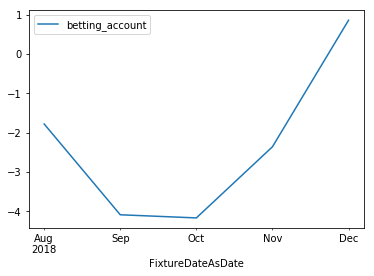

In [24]:
df=summary(fix_pred,'M')
df.plot(y='betting_account')
plt.show()

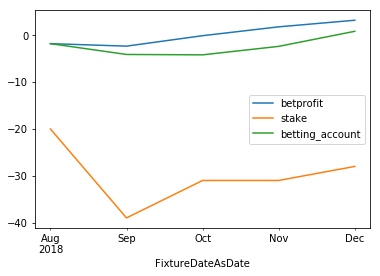

In [25]:
summary(fix_pred,'M').plot()

In [180]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True)

HomeTeamResult        D   L    W  All
leagueid prediction                  
1        L           10  27    9   46
         W           16  16   42   74
2        L           21  24   21   66
         W           42  28   68  138
All                  89  95  140  324

In [184]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, normalize='columns')

HomeTeamResult              D         L         W
leagueid prediction                              
1        L           0.112360  0.284211  0.064286
         W           0.179775  0.168421  0.300000
2        L           0.235955  0.252632  0.150000
         W           0.471910  0.294737  0.485714

In [181]:
pd.crosstab([fix_pred.df.leagueid, fix_pred.df.prediction], fix_pred.df.HomeTeamResult, margins=True).apply(lambda r: r/r.sum(), axis=1)

HomeTeamResult              D         L         W  All
leagueid prediction                                   
1        L           0.108696  0.293478  0.097826  0.5
         W           0.108108  0.108108  0.283784  0.5
2        L           0.159091  0.181818  0.159091  0.5
         W           0.152174  0.101449  0.246377  0.5
All                  0.137346  0.146605  0.216049  0.5

In [185]:
# how to decide if we are going to bet on two teams that are very similar?  Home advantage?

In [187]:
df_d = fix_pred.df[fix_pred.df.HomeTeamResult=='D']
df_d.columns

Index(['FixtureID', 'season', 'leagueid', 'fixDate', 'HomeTeamID', 'FTHG',
       'AwayTeamID', 'FTAG', 'HomeELO_prev', 'AwayELO_prev', 'HomeTeamResult',
       'AwayTeamResult', 'HomeTeam', 'AwayTeam', 'FTHG_3', 'FTAG_3', 'FTHG_5',
       'FTAG_5', 'HomeOdds', 'DrawOdds', 'AwayOdds', 'FixtureDateAsDate',
       'Target', 'HTRecord', 'ATRecord', 'ExpectedResult', 'FTG_3', 'FTG_5',
       'prediction', 'stake', 'applic_odds', 'betprofit'],
      dtype='object')

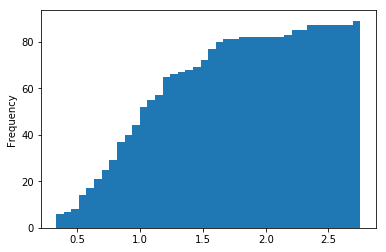

In [190]:
df_d.ExpectedResult.plot.hist(bins=40,cumulative=True)

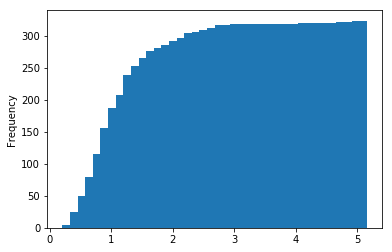

In [191]:
fix_pred.df.ExpectedResult.plot.hist(bins=40,cumulative=True)